### Project and data are based on a free, online course of machine learning https://www.coursera.org/learn/machine-learning. I wholeheartedly recommend this! 
I will show how do it in Python:
    + linear regression for one and more variables,
    + gradient descent algorithm,
    + cost function for linear regression,
    + broadcasting and vectorization in numpy library,
    + how use build-in minimize function with 'BFGS',
    + data visualisation in 2D and 3D.

In [16]:
%matplotlib inline

import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.optimize import minimize
import sys



print('Python version', sys.version)

# save packages version
# ! outter command
! python -m pip list | findstr "numpy pandas matplotlib seaborn scipy" > packages_version.txt
# list files
! ls

Python version 3.5.4 |Anaconda, Inc.| (default, Nov  8 2017, 14:34:30) [MSC v.1900 64 bit (AMD64)]
Linear regression.ipynb
ex1data1.txt
ex1data2.txt
packages_version.txt


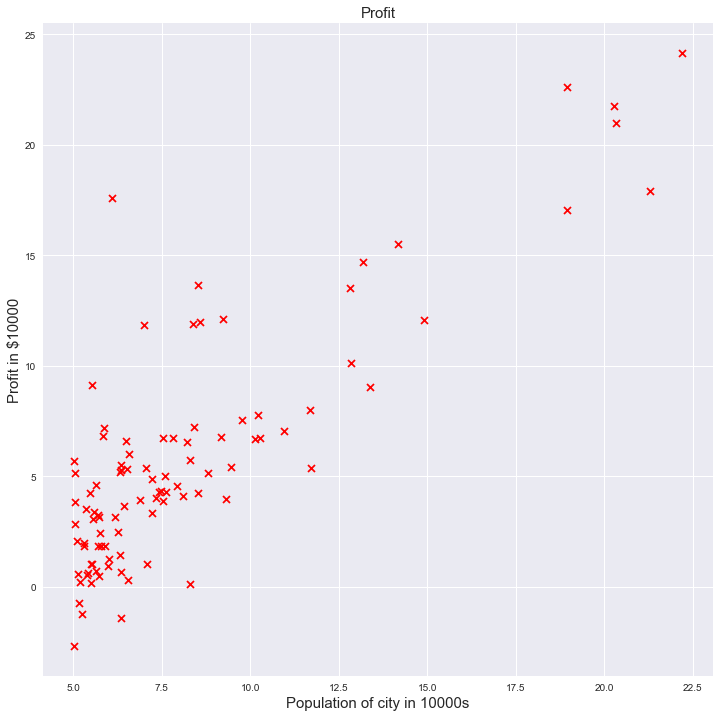

In [17]:
# read data
data1 = pd.read_csv('ex1data1.txt', header = None)
# split data to X and Y, transform to columns
X = data1[0].values[np.newaxis].T 
Y = data1[1].values[np.newaxis].T

fig = plt.figure(figsize=(12,12)) 
ax1 = fig.gca() # get current axis
ax1.set_title("Profit", size = 15)
ax1.set_xlabel("Population of city in 10000s", size = 15)
ax1.set_ylabel("Profit in $10000", size = 15)
ax1.scatter(X,Y, color='red', marker='x', label = 'data point');



In [18]:
def compute_cost(theta, X, Y):
    '''
    Computes value of cost funtion, where
    theta is matrix n x 1,
    X is m x n,
    Y is m x 1.
    '''
    m = len(X)
    n = len(theta)
    theta = np.array(theta).reshape(n,1)
    return np.sum((X @ theta - Y)**2)/(2*m) # @ = matrix mul operator

def gradient_descent(theta, X, Y, alpha, num_iters):
    '''
    Finds local minimum using gradient descent algorithm,
    alpha is a step,
    num_iters is a number of iteration.
    '''  
    m = len(X)
    J_history = []
    for _ in range(num_iters):
        delta = X.T @ (X @ theta - Y)
        theta = theta - alpha/m*delta;
        J_history.append(compute_cost(theta, X, Y))
    return theta, J_history

def normal_equation(X, Y):
    '''
    Returns theta what minimalize cost function for linear equation.
    '''
    return np.linalg.inv((X.T @ X)) @ X.T @ Y

def jac(theta, X, Y):
    '''
    Returns gradient n x 1 for cost function 
    '''
    m = len(Y)
    n = len(theta)
    theta = np.array(theta).reshape(n,1)
    temp = (X.T @ (X @ theta - Y)/m)
    
    return np.array([el[0] for el in temp])

def predict_value(x, theta):
    '''
    Returns predicted value at point x.
    '''
    len_theta = len(theta)
    len_x = len(x)
    theta = np.array(theta).reshape(len_theta, 1)
    x = np.array(x).flatten()
    return np.sum(x @ theta)

def con_ones(X):
    '''
    Add 1s columns to X
    '''
    m = Y.shape[0]
    ones = np.ones((m,1))
    return np.concatenate((ones, X),axis = 1)

def feature_normalize(X):
    '''
    Return normalized features. It improves gradient descent.
    '''
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    return (X - mu)/sigma, mu, sigma

In [19]:
X_ones = con_ones(X) # Adding ones column to X, which corespond to theta0 * 1
# Compute optimal theta from normal equation
theta_normal_equation = normal_equation(X_ones, Y)

# Compute optimal theta using BFGS methos
theta_min = np.zeros((2,1))
res = minimize(compute_cost,theta_min, args = (X_ones,Y),method = 'BFGS',jac = jac)
theta_min = res.x

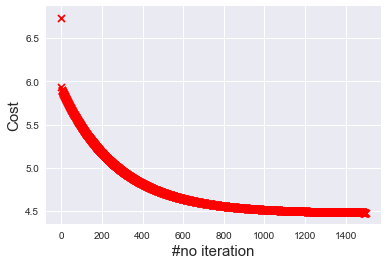

In [20]:
# Computing Cost through iterations
theta = np.zeros((2,1))
iterations = 1500;
alpha = 0.01;

theta, J_history = gradient_descent(theta, X_ones, Y, alpha, iterations)
plt.scatter(range(iterations),J_history, color='red', marker='x')
plt.xlabel('#no iteration', size = 15)
plt.ylabel('Cost', size = 15);

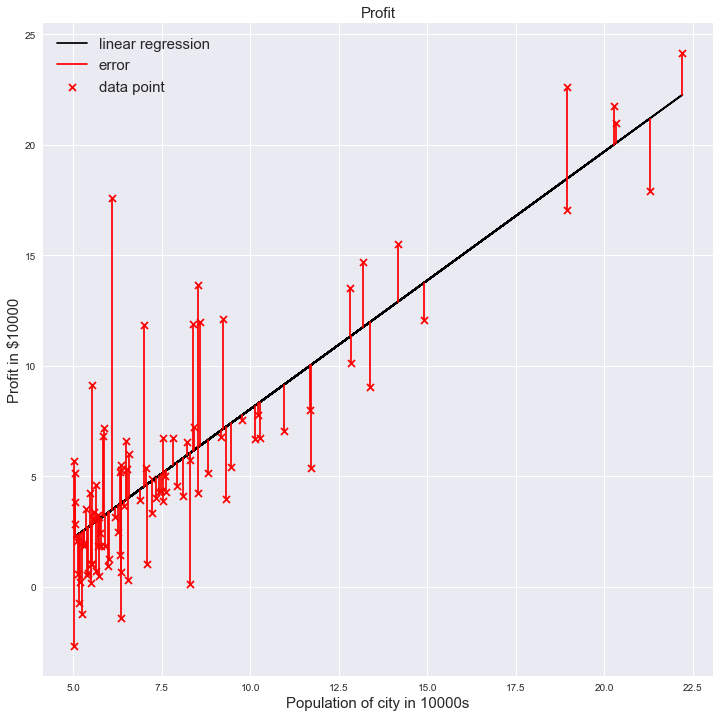

In [21]:
# Draw prediction line
ax1.plot(X, X_ones @ theta, color = 'k', label = 'linear regression')
i = False

#Plotting error for every training point
for x, y in zip(X_ones, Y):
    x0, y0 = x[1], y[0]
    x1, y1 = x0, predict_value(np.array([1, x0]), theta)
    ax1.plot([x0, x1], [y0, y1], color = 'r', label = 'error' if i == False else "") #label only for first error
    i = True
ax1.legend(loc=2, prop={'size': 15})
ax1.figure

In [22]:
# Predict values for population sizes of 35 000 and 200 000
predict1 = predict_value([1, 3.5], theta) # 3.5 because scale in 10 000
predict2 = predict_value([1, 20], theta)
print('Prediction with theta from my gradient descent implementation')
print('Profit prediction for 35 000 population {0:.2f}$'.format(predict1 * 10000))
print('Profit prediction for 200 000 population {0:.2f}$'.format(predict2 * 10000))

predict1 = predict_value([1, 3.5], theta_min)
predict2 = predict_value([1, 20], theta_min)
print()

print('Prediction with theta from build-in minimilize function')
print('Profit prediction for 35 000 population {0:.2f}$'.format(predict1 * 10000))
print('Profit prediction for 200 000 population {0:.2f}$'.format(predict2 * 10000))
print()

min_cost_theta = compute_cost(theta, X_ones, Y)
min_cost_theta_min = compute_cost(theta_min, X_ones, Y)

print('Minimal cost computed by my gradient descent implementation {0:.3f}'.format(min_cost_theta))
print('Minimal cost computed by build-in minimilise function {0:.3f}'.format(min_cost_theta_min))
print()
print('Build-in function almost always will get better solution than custom implementation.')

Prediction with theta from my gradient descent implementation
Profit prediction for 35 000 population 4519.77$
Profit prediction for 200 000 population 196969.56$

Prediction with theta from build-in minimilize function
Profit prediction for 35 000 population 2798.33$
Profit prediction for 200 000 population 199649.01$

Minimal cost computed by my gradient descent implementation 4.483
Minimal cost computed by build-in minimilise function 4.477

Build-in function almost always will get better solution than custom implementation.


In [23]:
# Compute cost for theta to visualise it in 3D plot
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta_temp = np.array([[theta0_vals[j]],
                          [theta1_vals[i]]])
        J_vals[i][j]= compute_cost(theta_temp, X_ones, Y) #Calculate cost function for every theta


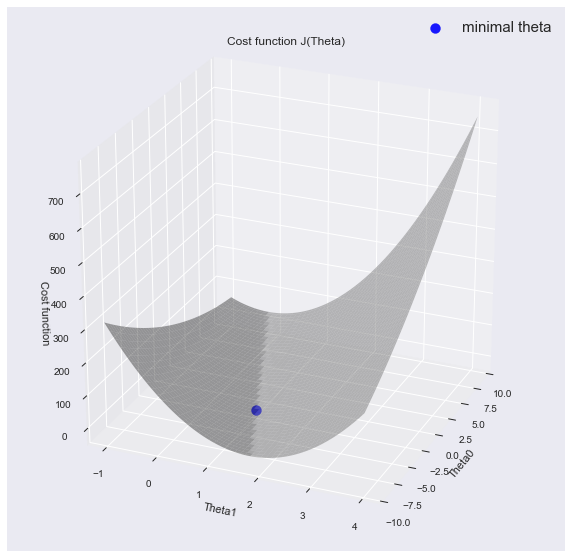

In [24]:
#Plot Cost function

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
X1, X2 = np.meshgrid(theta0_vals, theta1_vals )

ax.plot_surface(X1, X2, J_vals, color = 'gray',alpha=0.5)
ax.set_xlim(10,-10)
ax.set_zlabel('Cost function')
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_title('Cost function J(Theta)')
ax.view_init(25, 23)
ax.scatter3D(theta[0], theta[1], compute_cost(theta, X_ones, Y), color = 'blue', s = 100, alpha = 0.9,
            label = 'minimal theta');
ax.legend(prop={'size': 15});

Now we are drawing a contour plot and comparing optimal theta (theta for what cost function in minimal).
It was expected that python minimize build-in function will get better solutions than mine own.

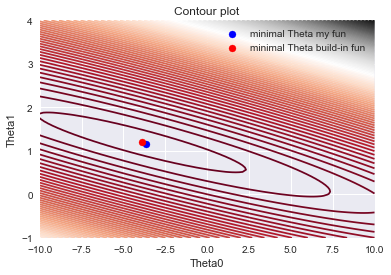

In [25]:
plt.contour(X1, X2, J_vals, 100, cmap='RdGy')
plt.scatter(theta[0],theta[1], color = 'blue', label = 'minimal Theta my fun')
plt.scatter(theta_min[0],theta_min[1], color = 'red', label = 'minimal Theta build-in fun')
plt.title('Contour plot')
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.legend();

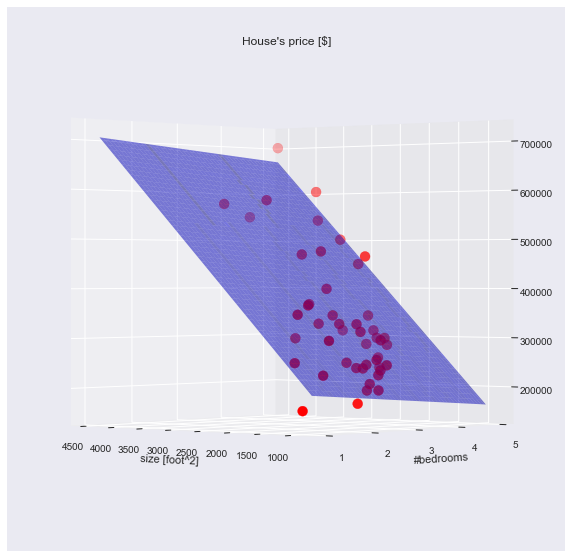

In [26]:

# Load new data
data2 = pd.read_csv('ex1data2.txt', header = None)
X = data2.iloc[:,:2].values # takes two first column
Y = data2[2][:].values[np.newaxis].T


alpha = 0.1
theta = np.zeros((3, 1))


# Make grid for x0 and x1
x0_min, x1_min = np.min(X, axis = 0)
x0_max, x1_max = np.max(X, axis = 0)
x0_range = np.linspace(x0_min, x0_max, 100)
x1_range = np.linspace(x1_min, x1_max, 100)


# Plot data in 3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.view_init(0, 130)
ax.scatter3D(X[:,0],X[:,1],Y, s=100, color = 'r')


X_norm_ones, mu, sigma = feature_normalize(X)

X = con_ones(X)
X_norm_ones = con_ones(X_norm_ones)
thetanormal_equation = normal_equation(X,Y)
theta, J_history = gradient_descent(theta, X_norm_ones, Y, alpha, 400)

# Calculate predicted values for grid.
Z = np.zeros((100, 100), dtype=np.float64)
for i in range(len(x0_range)):
    for j in range(len(x1_range)):
        x = np.array([1, x0_range[i], x1_range[j]])
        Z[j][i] = x @ thetanormal_equation
    
X1, X2 = np.meshgrid(x0_range, x1_range)

# Plot plane which predicts house's price
ax.plot_surface(X1, X2, Z, color = 'blue', alpha = 0.5)
ax.set_ylabel('#bedrooms')
ax.set_xlabel('size [foot^2]')
ax.set_title("House's price [$]")
ax.invert_yaxis()
# Set #bedrooms values as integer.
ax.yaxis.set_major_locator(MaxNLocator(integer=True)) 


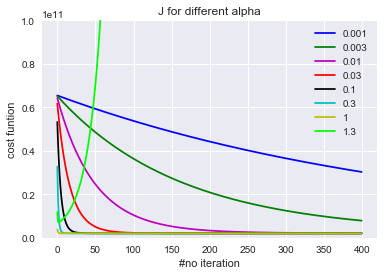

In [27]:
#Plot cost function for different learning rates (alpha)
Result = {}
for alpha in  [1.3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001]:
    theta_temp = np.zeros((3, 1))
    _, J_history = gradient_descent(theta_temp, X_norm_ones, Y, alpha, 400)
    Result[alpha] = J_history

colors = iter(['b', 'g', 'm', 'r', 'k', 'c', 'y', 'lime'])
for alpha, error_data in sorted(Result.items(), key = lambda x: x[0]):
    plt.plot(error_data, label=str(alpha), color= next(colors))
plt.ylim(0,10e10)
plt.legend()
plt.xlabel('#no iteration')
plt.ylabel('cost funtion')
plt.title('J for different alpha');

In [28]:
# Compute optimal theta using BFGS method
theta_min = np.zeros((3,1))
res = minimize(compute_cost, [theta_min], args = (X,Y),method = 'BFGS',jac = jac)
theta_min = res.x

In [29]:
predict1 = predict_value([1, 3000, 1], thetanormal_equation)
predict2 = predict_value([1, 4000, 3], thetanormal_equation) 

print('Predictions using theta from normal equation')
print("Predicted price of house = {}, if size = {} and #bedroom = {}".format(round(predict1,6), 3000, 1))
print("Predicted price of house = {}, if size = {} and #bedroom = {}".format(round(predict2,6), 4000, 3))
print()

predict1 = predict_value([1, 3000, 1], theta_min)
predict2 = predict_value([1, 4000, 3], theta_min) 
print('Predictions using theta build-in minimize function')
print("Predicted price of house = {}, if size = {} and #bedroom = {}".format(round(predict1,6), 3000, 1))
print("Predicted price of house = {}, if size = {} and #bedroom = {}".format(round(predict2,6), 4000, 3))
print()

# Now we have to normalize feature to use theta computed from normalised data.
print('Predictions using theta from gradient descent and normalised data')
x1 = np.array([3000, 1])
x1 = (x1 - mu)/sigma
x1 = np.concatenate(([1], x1))

predict1 = predict_value(x1, theta)
print("Predicted price of house = {}, if size = {} and #bedroom = {}".format(round(predict1,6), 3000, 1))

x2 = np.array([4000, 3])
x2 = (x2 - mu)/sigma
x2 = np.concatenate(([1], x2))
predict2 = predict_value(x2, theta)
print("Predicted price of house = {}, if size = {} and #bedroom = {}".format(round(predict2,6), 4000, 3))

Predictions using theta from normal equation
Predicted price of house = 498491.912483, if size = 3000 and #bedroom = 1
Predicted price of house = 620226.548276, if size = 4000 and #bedroom = 3

Predictions using theta build-in minimize function
Predicted price of house = 498491.912484, if size = 3000 and #bedroom = 1
Predicted price of house = 620226.548277, if size = 4000 and #bedroom = 3

Predictions using theta from gradient descent and normalised data
Predicted price of house = 498491.908815, if size = 3000 and #bedroom = 1
Predicted price of house = 620226.54583, if size = 4000 and #bedroom = 3
